In [129]:
import json
import re
import nltk
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')


nombre = 'alferdez'
mes = '08'
filename = 'd:/Facultad/Tesis/Twitter/2019'+mes+'-'+nombre+'.txt'
medios_oficiales = ['Clarín', 'La Nación', 'El Litoral', 'Página|12', 'Bariloche Digital', 'Diario El Ciudadano', 'Radio Mitre', 'infobae', 'TN - Todo Noticias', 'Ámbito Financiero']
medios_oficiales_screnn = ['clarincom', 'lanacion', 'ellitoral', 'pagina12', 'barilochedigital', 'elciudadanoweb', 'radiomitre', 'infobae', 'todonoticias', 'Ambitocom']
medios_oficiales_screnn_2 = ['ellitoral', 'barilochedigital', 'pagina12', 'elciudadanodiario', 'elsigloweb', 'diarionorte', 'diariotextual', 'opisantacruz', 'eldiadelaplata', 'elciudadanoweb', 'chubutparatodos', 'tunoticia', 'diarionoticias', 'lagacetasalta', 'radiomitre', 'elzonda', 'jujuyaldia', 'santacruzalmomento', 'eldoce', 'tncorrientes', 'ultimahora', 'elpregon', 'misionesonline', 'informatesalta', 'losandes', 'laprensa', 'losprimerostv', 'diariouno', 'corrienteshoy', 'elesquiu', 'lamañanaformosa', 'app', 'infobae', 'lagaceta', 'lanacion', 'tn', 'clarin', 'laredlarioja', 'infomerlo', 'm24digital', 'elliberal', 'diariamente', 'chacodiapordia', 'informedigital', 'laprensafederal', 'elindependiente', 'vocescriticas', 'opinionciudadana', 'lamañanacordoba', 'elancasti', 'eltiemposanjuan', 'primeraedicion', 'telam', 'ambito', 'elcomodorense', 'surenio', 'lavoz']
def take_url(json_data):
    try:
        url = json_data['urls'][0]['expanded_url']
    except:
        url = ''
    return url

def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def rm_stopwords(frase):
    palabras = nltk.word_tokenize(frase)
    filtered_words = [word for word in palabras if word.lower() not in stopwords_sp]
    return ' '.join(filtered_words)


def borrar_url(tweet, url):
    if url != 0:
        try:
            t = tweet.replace(str(url), "")     
        except:
            t = tweet
    else:
        t = tweet
    return t

def limpiar_tweets(tweet):
    t = re.sub(r'https://t\.co/\S+', '', tweet)
    t = re.sub(r'#\w+', '', t)
    #t = re.sub(r'@\w+', '', t)
    t = t.replace('@','')
    #t = re.sub(r'[^\x00-\x7F]+', '', t)
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                "]+", flags=re.UNICODE)
    
    t = emoji_pattern.sub(r'', t)
    t = rm_stopwords(t)
    #t = replace(t)
    t = t.replace("`` ", '"')
    t = t.replace("''", '"')
    return t

def salvando_tweets(filename):
    dias = []
    frases = []
    urls = []
    url_reales = []
    verified = []
    medios = []
    tweets_limpios = []
    with open(filename, 'r', encoding = "utf8") as fp:
        for i, line in enumerate(fp):
            # Para cada linea lee el json y extrae la fecha
            json_data = json.loads(line)
            url_real = take_url(json_data)
            tweet = json_data['text']
            url = json_data['urls']
            extra = json_data
            #print(json_data)


            if tweet[0:2] != 'RT':
                user = json_data['user']
                frases.append(tweet)
                dias.append(json_data['created_at'])
                
                try:
                    verified.append(user['verified'])
                except:
                    verified.append(False)

                try:
                    urls_ = url[0]['url']
                    urls.append(json_data)
                    #print(url[0])
                    t = borrar_url(tweet, urls_)
                    url_reales.append(url_real)
                except:
                    t = tweet
                    urls.append(0)
                    url_reales.append(0)


                try:
                    if user['name'] in medios_oficiales or user['screename'] in medios_oficiales_screnn or user['screename'] in medios_oficiales_screnn_2 :
                        medios.append(True)
                    else:
                        medios.append(False)
                except:
                    medios.append(False)

                #t = borrar_url(tweet, urls_)

                tweets_limpios.append(limpiar_tweets(tweet))
                # if urls != 0:
                #     try:
                #         t = tweet.replace(str(url), "")
                #         tweets_limpios.append(t)
                #     except:
                #         t = tweet
                #         tweets_limpios.append(t)
                # else:
                #     tweets_limpios.append(t)


            # if i == 500:
            #     break       

        return frases, tweets_limpios, dias, urls, url_reales,medios
    
#frases, tw_limpios,dias, urls, url_reales, medios = salvando_tweets(filename)

In [29]:
import pandas as pd
df = pd.DataFrame({'Tweets': frases, 'Tw_limpios': tw_limpios, 'Fecha': dias, 'urls': urls, 'urls_reales': url_reales, 'medios': medios})
df['Tweets_sin_url'] = df.apply(lambda row: borrar_url(row['Tweets'], row['urls']), axis = 1)

In [130]:
import pandas as pd

def borrar_url(tweet, url):
    if urls != 0:
        try:
            t = tweet.replace(str(url), "")     
        except:
            t = tweet
    else:
        t = tweet
    return t

frases, tw_limpios, dias, urls, url_reales, medios = salvando_tweets(filename)


df = pd.DataFrame({'Tweets': frases, 'Tw_limpios': tw_limpios, 'Fecha': dias, 'urls': urls, 'urls_reales': url_reales, 'medios': medios})
#df['Tweets_sin_url'] = df.apply(lambda row: borrar_url(row['Tweets'], row['urls']), axis = 1)
#df.to_csv("Tweets_"+nombre+"_aug.csv")

In [138]:
df = pd.read_csv('d:/Facultad/Tweets_october_00.csv')
df

,id,Tweets,Tw_limpios,Fecha,urls,medios,source
0,1101345583879602179,@diegocapanna75 Gracias yo creí que lo pusiste...,diegocapanna75 Gracias creí pusiste verdad . I...,Fri Mar 01 04:57:03 +0000 2019,https://twitter.com/i/web/status/1101345583879...,False,Twitter for Android
1,1101347642993491968,"”la muni de Germán Alfaro, q es Mauricio Macri...","” muni Germán Alfaro , q Mauricio Macri . Vamo...",Fri Mar 01 05:05:14 +0000 2019,https://twitter.com/i/web/status/1101347642993...,False,Twitter for iPhone
2,1101347243490185216,"@mendieta Escuchar gente más educada, moderad...","mendieta Escuchar gente educada , moderada gla...",Fri Mar 01 05:03:39 +0000 2019,https://twitter.com/i/web/status/1101347243490...,False,Twitter for Android
3,1101351636709138432,Un peronista hablando de República! Los que la...,peronista hablando República ! bastardearon de...,Fri Mar 01 05:21:06 +0000 2019,https://twitter.com/i/web/status/1101351636709...,False,Twitter for Android
4,1101351503036641280,Dante López Foresi Los radicales hicieron pres...,Dante López Foresi radicales hicieron presiden...,Fri Mar 01 05:20:35 +0000 2019,https://twitter.com/i/web/status/1101351503036...,False,Twitter for Android
...,...,...,...,...,...,...,...
57594,1112563322619076614,la rap line haciendo un cover de la marcha per...,rap line haciendo cover marcha peronista,Mon Apr 01 03:52:21 +0000 2019,NaN,False,Twitter for Android
57595,1112562872280846336,@robdnavarro Por qué bonadio es peronista,robdnavarro bonadio peronista,Mon Apr 01 03:50:33 +0000 2019,NaN,False,Twitter for Android
57596,1112562858917838848,"#Racing es pueblo peronista, es brillo en el b...","pueblo peronista , brillo barro peores crisis !",Mon Apr 01 03:50:30 +0000 2019,https://twitter.com/LaBandaDeRacing/status/111...,False,Twitter for Android
57597,1112562696153649152,"@JuanCruzVila4 Nunca, NUNCA. Hay una frase que...","JuanCruzVila4 Nunca , NUNCA . frase además doc...",Mon Apr 01 03:49:51 +0000 2019,https://twitter.com/i/web/status/1112562696153...,False,Twitter for Android


In [11]:
path_git=  'c:/Git_Proyects/Tesis/Base_Twitter/'
alberto1 = pd.read_csv(path_git+'Tweets_Alberto-AND-Fernandez_aug.csv')
alberto2 = pd.read_csv(path_git+'Tweets_alferdez_aug.csv')

2

In [18]:
albert_full = pd.concat([alberto1, alberto2])
albert_full.to_csv(path_git+'Tweets_Alberto_Fernandez_aug.csv')

In [10]:
import json
import re
nombre = 'alferdez'
mes = '08'
filename = 'd:/Facultad/Tesis/Twitter/2019'+mes+'-'+nombre+'.txt'

def salvando_tweets(filename):
    dias = []
    frases = []
    ss = []
    urls = []
    url_reales = []
    verified = []
    medios = []
    with open(filename, 'r', encoding = "utf8") as fp:
        for i, line in enumerate(fp):
            # Para cada linea lee el json y extrae la fecha
            json_data = json.loads(line)
            tweet = json_data['text']




            if tweet[0:2] != 'RT':
                user = json_data['user']
                frases.append(tweet)
                dias.append(json_data['created_at'])

                source = json_data['source']
                matches = re.findall(r'>\s*(.*?)\s*<', source)

                ss.append(matches[0])
            # if i == 100:
            #     break
        return ss

sources = salvando_tweets(filename)

In [17]:
set(sources[0:10000])

{'ADiarios - CMS Para Diarios',
 'Echobox Social',
 'Echofon',
 'El País Digital',
 'Facebook',
 'Hootsuite Inc.',
 'IFTTT',
 'Instagram',
 'Loomly',
 'Mobile Web (M2)',
 'Sprout Social',
 'TweetDeck',
 'Tweetbot for iΟS',
 'TwitPane for Android',
 'Twitter Media Studio',
 'Twitter Web App',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPad',
 'Twitter for iPhone',
 'WordPress.com'}

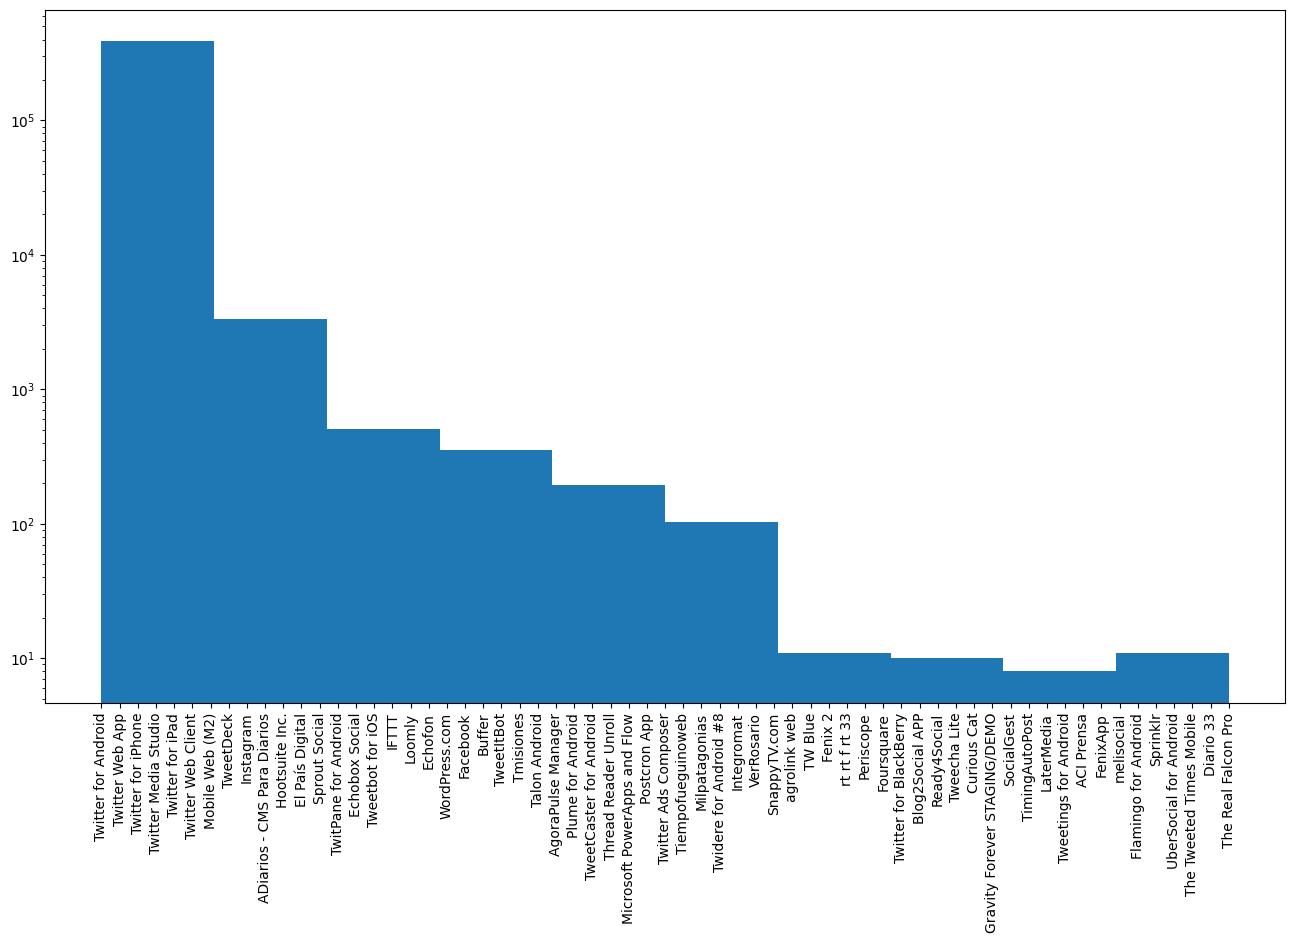

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.hist(sources)
plt.xticks(rotation = 90)
plt.yscale('log')
